In [21]:
# imports 
import os
import pandas as pd
import numpy as np

# load data
train = pd.read_csv('../data/processed/train_data_processed.csv')
test = pd.read_csv('../data/processed/test_data_processed.csv')
val = pd.read_csv('../data/processed/val_data_processed.csv')

In [22]:
# more feature engineering
# use encoder to encode OCCURRED_ON_DATE column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['OCCURRED_ON_DATE'] = le.fit_transform(train['OCCURRED_ON_DATE'])
test['OCCURRED_ON_DATE'] = le.transform(test['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] = le.transform(val['OCCURRED_ON_DATE'])

In [23]:
# save le 
import joblib
joblib.dump(le, '../models/datetime_encoder.pkl')

['../models/datetime_encoder.pkl']

In [24]:
#drop _id column

test = test.drop('_id', axis=1)
val = val.drop('_id', axis=1)

In [25]:
# define the target variable
y_train = train['Severe_crimes']
y_test = test['Severe_crimes']
y_val = val['Severe_crimes']

# define the features
X_train = train.drop(['Severe_crimes'], axis=1)
X_test = test.drop(['Severe_crimes'], axis=1)
X_val = val.drop(['Severe_crimes'], axis=1)

In [26]:
# test on 9 different models

# first: random forest classifier

from sklearn.ensemble import RandomForestClassifier

# define the number of trees
n_estimators = [200, 500, 1000, 1500, 2000]
val_acc_rf = []

# fit the model with the different number of trees
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    print(f'Number of trees: {n}')
    print(f'Train accuracy: {rf.score(X_train, y_train)}')
    print(f'Test accuracy: {rf.score(X_test, y_test)}')
    print(f'Validation accuracy: {rf.score(X_val, y_val)}')
    val_acc_rf.append(rf.score(X_val, y_val))
    print('-------------------------------------')

Number of trees: 200
Train accuracy: 0.9998541139856059
Test accuracy: 0.9952540480178671
Validation accuracy: 0.9939883645765999
-------------------------------------
Number of trees: 500
Train accuracy: 0.9998541139856059
Test accuracy: 0.9955332216638749
Validation accuracy: 0.9940530058177117
-------------------------------------
Number of trees: 1000
Train accuracy: 0.9998541139856059
Test accuracy: 0.9952540480178671
Validation accuracy: 0.9940530058177117
-------------------------------------
Number of trees: 1500
Train accuracy: 0.9998541139856059
Test accuracy: 0.9955332216638749
Validation accuracy: 0.9940530058177117
-------------------------------------
Number of trees: 2000
Train accuracy: 0.9998541139856059
Test accuracy: 0.9955332216638749
Validation accuracy: 0.9940530058177117
-------------------------------------


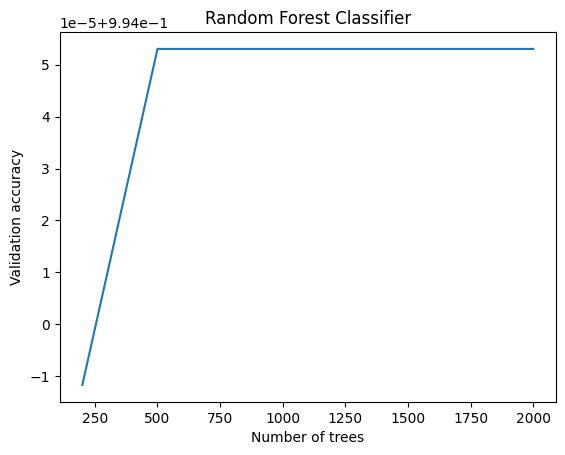

[0.9939883645765999, 0.9940530058177117, 0.9940530058177117, 0.9940530058177117, 0.9940530058177117]


In [27]:
# draw the validation accuracy vs number of trees
import matplotlib.pyplot as plt


plt.plot(n_estimators, val_acc_rf)
plt.xlabel('Number of trees')
plt.ylabel('Validation accuracy')
plt.title('Random Forest Classifier')
plt.show()
print(val_acc_rf)


In [28]:
# second model: Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# test using different learning rates
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
val_acc_gb = []

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=101, learning_rate = learning_rate, max_features=2, max_depth = 4, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))
    val_acc_gb.append(gb.score(X_val, y_val))
    print('-------------------------------------')

Learning rate:  0.05
Accuracy score (training): 0.994
Accuracy score (validation): 0.994
-------------------------------------
Learning rate:  0.1
Accuracy score (training): 0.995
Accuracy score (validation): 0.994
-------------------------------------
Learning rate:  0.25
Accuracy score (training): 0.995
Accuracy score (validation): 0.994
-------------------------------------
Learning rate:  0.5
Accuracy score (training): 0.901
Accuracy score (validation): 0.897
-------------------------------------
Learning rate:  0.75
Accuracy score (training): 0.568
Accuracy score (validation): 0.566
-------------------------------------
Learning rate:  1
Accuracy score (training): 0.730
Accuracy score (validation): 0.733
-------------------------------------


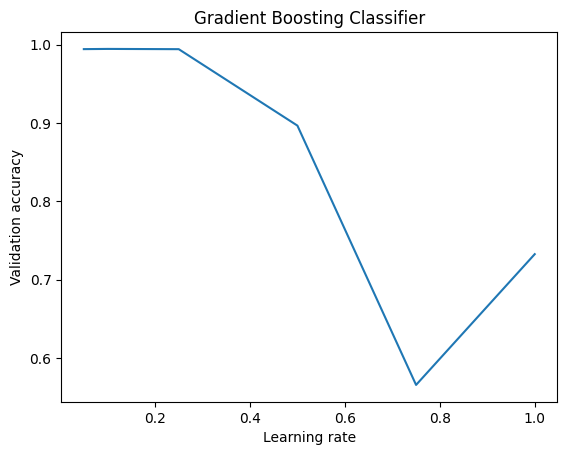

In [29]:
# plot the validation accuracy vs learning rate
plt.plot(learning_rates, val_acc_gb)
plt.xlabel('Learning rate')
plt.ylabel('Validation accuracy')
plt.title('Gradient Boosting Classifier')
plt.show()


In [30]:
# model 3: Cnn

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from sklearn.metrics import f1_score
# test different dropout rates
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
f1_scores = []
val_acc_scores = []

for rate in dropout_rates:
    model = Sequential()
    model.add(Dense(64, input_dim=7, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

    # use the model on validation data and evaluate
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)

    # f1 score
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

    # validation accuracy
    val_acc = accuracy_score(y_val, y_pred)
    val_acc_scores.append(val_acc)

print(f1_scores)










Epoch 1/50


964/964 [==============================] - 2s 2ms/step - loss: 0.9763 - accuracy: 0.9153 - val_loss: 0.1361 - val_accuracy: 0.9366
Epoch 2/50
964/964 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9326 - val_loss: 0.1357 - val_accuracy: 0.9366
Epoch 3/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1514 - accuracy: 0.9357 - val_loss: 0.1256 - val_accuracy: 0.9418
Epoch 4/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1251 - accuracy: 0.9401 - val_loss: 0.0971 - val_accuracy: 0.9529
Epoch 5/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.9557 - val_loss: 0.0911 - val_accuracy: 0.9679
Epoch 6/50
964/964 [==============================] - 1s 1ms/step - loss: 0.0994 - accuracy: 0.9646 - val_loss: 0.0846 - val_accuracy: 0.9715
Epoch 7/50
964/964 [==============================] - 1s 1ms/step - loss: 0.0949 - accuracy: 0.9666 - val_loss: 0.0854 - val_accuracy: 0.9725
E

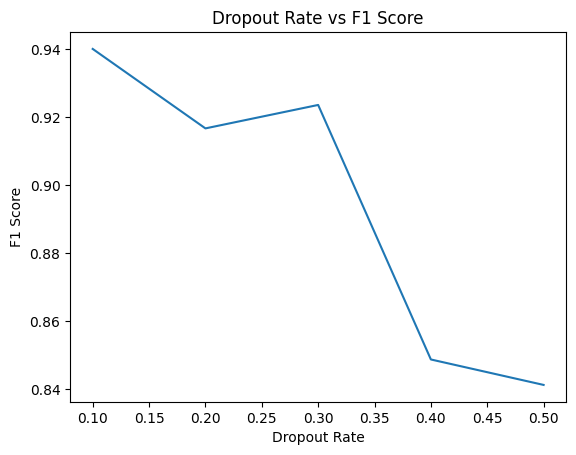

In [31]:
# draw the dropout rates vs f1 scores
import matplotlib.pyplot as plt
plt.plot(dropout_rates, f1_scores)
plt.xlabel('Dropout Rate')
plt.ylabel('F1 Score')
plt.title('Dropout Rate vs F1 Score')
plt.show()


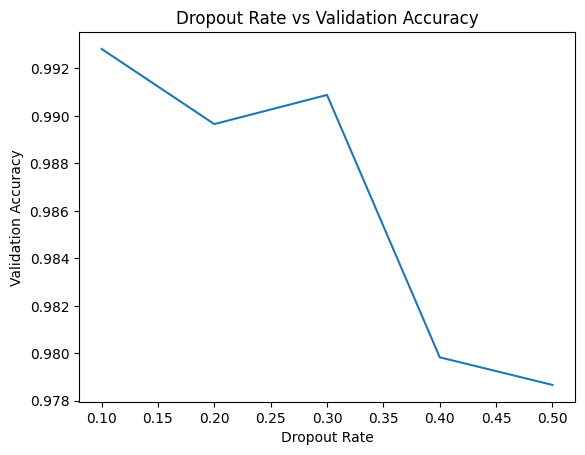

In [32]:
# draw the dropout rates vs validation accuracy
plt.plot(dropout_rates, val_acc_scores)
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.title('Dropout Rate vs Validation Accuracy')
plt.show()


In [33]:
#

In [34]:
# model 4: XGBoost
from xgboost import XGBClassifier

# test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
val_acc_scores_xgb = []

for rate in learning_rates:
    xgb = XGBClassifier(learning_rate=rate)
    xgb.fit(X_train, y_train)
    print(f'Learning rate: {rate}')
    print(f'Train accuracy: {xgb.score(X_train, y_train)}')
    print(f'Test accuracy: {xgb.score(X_test, y_test)}')
    print(f'Validation accuracy: {xgb.score(X_val, y_val)}')
    val_acc_scores_xgb.append(xgb.score(X_val, y_val))
    print('-------------------------------------')


Learning rate: 0.01
Train accuracy: 0.9940673020813071
Test accuracy: 0.9949748743718593
Validation accuracy: 0.9942469295410472
-------------------------------------
Learning rate: 0.05
Train accuracy: 0.9946022174674188
Test accuracy: 0.9960915689558906
Validation accuracy: 0.9945054945054945
-------------------------------------
Learning rate: 0.1
Train accuracy: 0.994893989496207
Test accuracy: 0.9955332216638749
Validation accuracy: 0.9942469295410472
-------------------------------------
Learning rate: 0.2
Train accuracy: 0.9958503533683459
Test accuracy: 0.9955332216638749
Validation accuracy: 0.9939237233354881
-------------------------------------
Learning rate: 0.3
Train accuracy: 0.9966284121117811
Test accuracy: 0.9944165270798436
Validation accuracy: 0.9934712346477053
-------------------------------------


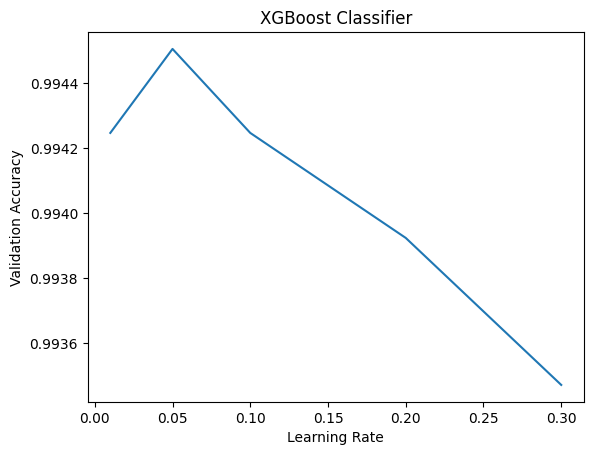

In [35]:
# draw the learning rates vs validation accuracy
plt.plot(learning_rates, val_acc_scores_xgb)
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('XGBoost Classifier')
plt.show()

